# TP House prices

## Récupération des données 

In [3]:
import pandas as pd

In [4]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

Let's get all our columns (one file is enough, they both treat the same datas)

In [5]:
len(df_test.columns)

80

In [6]:
len(df_train.columns)

81

## Exploration

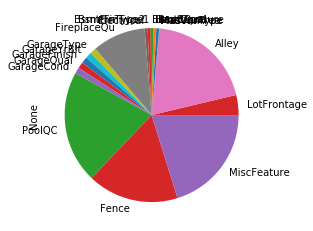

In [7]:
df_train.isnull().sum(axis = 0).plot(kind="pie")

In [8]:
top10 = df_train.corr().abs()["SalePrice"].sort_values(ascending=False)[0:10].index

### Filter

In [9]:
df_train_filter = df_train.filter(items=top10)
df_test_filter = df_test.filter(items=top10)

In [10]:
top10

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [11]:
import seaborn as sns

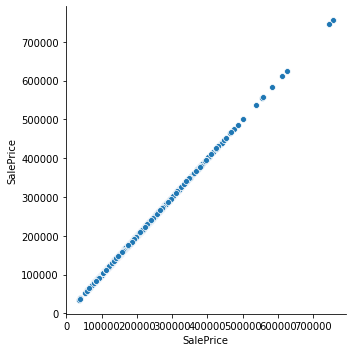

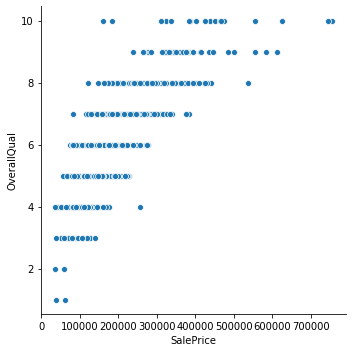

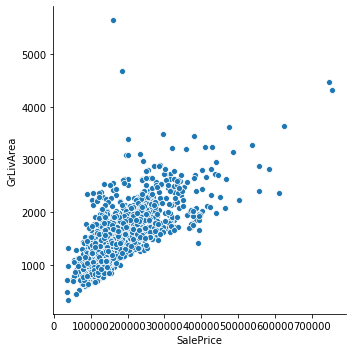

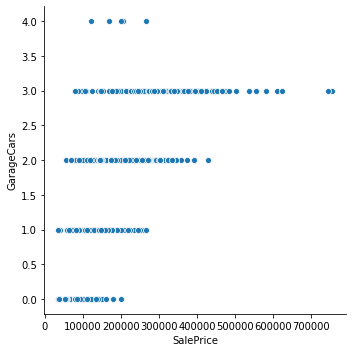

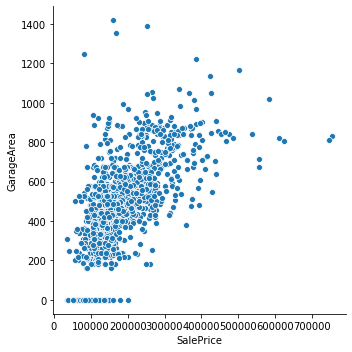

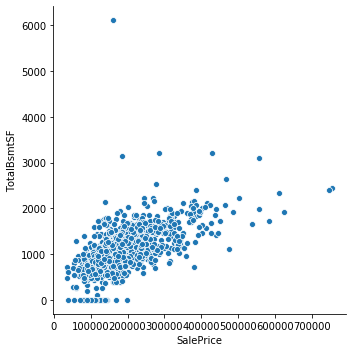

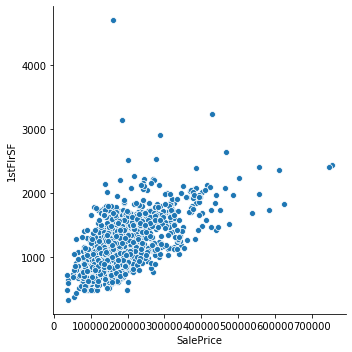

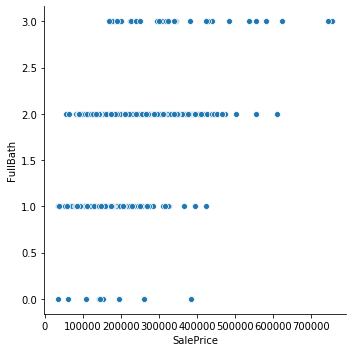

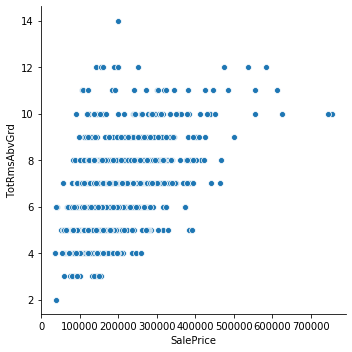

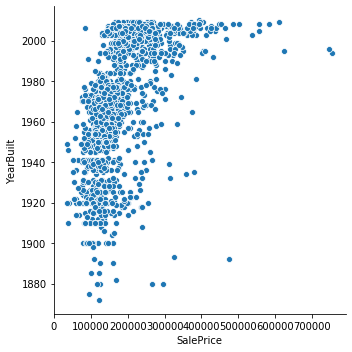

In [12]:
for col in top10:
    sns.relplot(x="SalePrice", y=col, data=df_train_filter)

## Data Cleaning

In [13]:
df_train_filter.isna().sum(axis = 0)

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [14]:
columns_nan = df_test_filter.isna().sum(axis = 0)

In [15]:
columns_nan = columns_nan[columns_nan >0].index

### Supression des nans 

In [16]:
for nan_column in columns_nan:
    df_test_filter[nan_column].fillna((df_test_filter[nan_column].mean()), inplace=True)

## Modeling 

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [18]:
y = df_train_filter["SalePrice"]

In [19]:
X = df_train_filter.drop(["SalePrice"], axis=1)

Random Forest

In [ ]:
regr = RandomForestRegressor(n_estimators=10000)
regr.fit(X, y)

Liner Regression

In [21]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [22]:
gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,15),
            'n_estimators': (10, 50, 100, 1000, 2000, 5000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
grid_result = gsc.fit(X, y)
print(grid_result.best_params_)

{'max_depth': 12, 'n_estimators': 10}


In [23]:
estimator = LinearRegression()

In [24]:
estimator.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_pred = regr.predict(df_test_filter)

In [42]:
y_pred

array([114218.42677805, 164838.84101486, 167174.95859349, ...,
       150105.65609336, 109023.13053693, 241765.58436227])

In [43]:
df_result = pd.concat([df_test["Id"], pd.Series(y_pred)], axis=1)
df_result.columns = ["Id", "SalePrice"]

In [28]:
df_result.to_csv("result_V4.2.csv", sep="," ,index=False )

## Hypothèses

In [30]:
1) Ajouter de nouvelles données
2) Warning : Numériser les données => scikit learn label encoder / one hot encoder
3) Warning : Attention Nan ( une autre méthode que moyenne ? )
4) Identifier et/ou supprimer données aberrantes
5) Standardiser les données : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
6)Model : tester de nouveaux modèles , optimiser les hypermparametres  (randomsearch, gridsearch)
7) CrossValidaton

SyntaxError: invalid syntax (<ipython-input-30-f96d8055d94b>, line 1)